<a href="https://colab.research.google.com/github/saad1ibn2akhter/AI_Olympiad_problems_and_solutions/blob/main/test_score_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
!pip install catboost

In [240]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler , normalize , OneHotEncoder , LabelEncoder  ,OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , r2_score
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

df = pd.read_csv('test_score.csv')
org = pd.read_csv('test_score.csv')
print(df.columns)
df.info()
df.head(5)


Index(['ID', 'Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5285 entries, 0 to 5284
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          5285 non-null   int64 
 1   Hours_Studied               5285 non-null   int64 
 2   Attendance                  5285 non-null   int64 
 3   Parental_Involvement        5285 non-null   object
 4   Access_to_Resources         5285 non-null   object
 5   Extracurricular_Activities 

,ID,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,...,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,1,27,79,Low,High,Yes,8,63,High,Yes,...,Low,Medium,Public,Negative,5,No,College,Moderate,Female,69
1,2,16,86,High,Medium,Yes,7,94,Medium,Yes,...,Low,High,Public,Neutral,3,No,High School,Moderate,Female,69
2,3,22,87,Low,Medium,No,8,83,Low,Yes,...,Low,Medium,Public,Neutral,1,No,College,Far,Male,66
3,4,18,100,High,Medium,Yes,10,86,Medium,Yes,...,Medium,Medium,Public,Neutral,3,No,High School,Near,Male,72
4,5,35,78,High,Low,Yes,10,99,Medium,Yes,...,Low,Medium,Private,Positive,2,No,High School,Near,Male,72


In [167]:
df['Parental_Involvement'].unique

<bound method Series.unique of 0          Low
1         High
2          Low
3         High
4         High
         ...  
5280    Medium
5281    Medium
5282      High
5283      High
5284    Medium
Name: Parental_Involvement, Length: 5285, dtype: object>

In [168]:
# # print(df['Access_to_Resources_High'])

# low_high = [
#     'Parental_Involvement',
#     'Access_to_Resources',
#     'Motivation_Level',
#     'Family_Income',
#     'Teacher_Quality'
# ]

# education = ['Parental_Education_level']
# distance = ['Distance_From_Home']
# yes_no = ['Learning_Disabilities' , 'Internet_Access' ,  'Extracurriculur_Activities']
# peer = ['Peer_Influence']
# school = ['School_Type' ]




# encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
# data = encoder.fit_transform(df[low_high])


# encoded = pd.DataFrame(data,
#                        columns=encoder.get_feature_names_out(low_high),
#                        index=df.index)


# encoded_df = pd.concat([df.drop(columns=low_high), encoded], axis=1)

# data = encoder.fit(df[yes_no])
# enc = pd.DataFrame(data ,
#                    columns = encoder.get_feature_names_out(yes_no),
#                    index = encoded_df.index
#                    )
# encoded_df2 = pd.concat([encoded_df.drop(columns = yes_no),enc],axis=1)







# # print(encoded_df.head(2))


In [169]:
df.head(2)
print(df.head(1))
print(df.columns)

   ID  Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0   1             27          79                  Low                High   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                        Yes            8               63             High   

  Internet_Access  ...  Family_Income Teacher_Quality School_Type  \
0             Yes  ...            Low          Medium      Public   

  Peer_Influence Physical_Activity  Learning_Disabilities  \
0       Negative                 5                     No   

  Parental_Education_Level Distance_from_Home  Gender Exam_Score  
0                  College           Moderate  Female         69  

[1 rows x 21 columns]
Index(['ID', 'Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quali

In [170]:
yes_no = ['Extracurricular_Activities' ,'Internet_Access' , ]
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
# data = encoder.fit_transform(df[''])

In [171]:
df.head(2)

,ID,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,...,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,1,27,79,Low,High,Yes,8,63,High,Yes,...,Low,Medium,Public,Negative,5,No,College,Moderate,Female,69
1,2,16,86,High,Medium,Yes,7,94,Medium,Yes,...,Low,High,Public,Neutral,3,No,High School,Moderate,Female,69


In [241]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
print(cat_cols)

# label = LabelEncoder()
# for col in cat_cols:
#     df[col] = label.fit_transform(df[col].astype(str))

ordinal = OrdinalEncoder()
df[cat_cols] = ordinal.fit_transform(df[cat_cols])
print(df.head(3))



['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
   ID  Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0   1             27          79                   1.0                  0.0   
1   2             16          86                   0.0                  2.0   
2   3             22          87                   1.0                  2.0   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                         1.0            8               63               0.0   
1                         1.0            7               94               2.0   
2                         0.0            8               83               1.0   

   Internet_Access  ...  Family_Income  Teacher_Quality  School_Type  \
0              

In [173]:
X = df.drop(columns=['Exam_Score'])
y = df['Exam_Score']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3 ,random_state=43 )

In [175]:
model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.2,
    depth=6,
    eval_metric='MAE',
    random_seed=42,
    verbose=50
)

model.fit(
    X_train , y_train ,
    cat_features= cat_cols,
    eval_set=(X_test, y_test),
    use_best_model=True
)

yhat = model.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

print(f"R2 : {r2*100} %")

0:	learn: 2.5682732	test: 2.4590277	best: 2.4590277 (0)	total: 31.9ms	remaining: 31.9s
50:	learn: 0.7854500	test: 0.7722230	best: 0.7721699 (49)	total: 872ms	remaining: 16.2s
100:	learn: 0.6545129	test: 0.6867905	best: 0.6867905 (100)	total: 2.43s	remaining: 21.6s
150:	learn: 0.6027748	test: 0.6769791	best: 0.6701087 (129)	total: 4.3s	remaining: 24.2s
200:	learn: 0.5761628	test: 0.6696461	best: 0.6696461 (200)	total: 5.55s	remaining: 22.1s
250:	learn: 0.5562619	test: 0.6840459	best: 0.6682560 (202)	total: 6.81s	remaining: 20.3s
300:	learn: 0.5362955	test: 0.7018360	best: 0.6682560 (202)	total: 8.25s	remaining: 19.2s
350:	learn: 0.5157739	test: 0.7098604	best: 0.6682560 (202)	total: 9.88s	remaining: 18.3s
400:	learn: 0.5034108	test: 0.7161045	best: 0.6682560 (202)	total: 11.2s	remaining: 16.7s
450:	learn: 0.4872138	test: 0.7291972	best: 0.6682560 (202)	total: 12.3s	remaining: 15s
500:	learn: 0.4717240	test: 0.7324231	best: 0.6682560 (202)	total: 13.7s	remaining: 13.6s
550:	learn: 0.4568

In [174]:
df.head(1)

,ID,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,...,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,1,27,79,1,0,1,8,63,0,1,...,1,2,1,0,5,0,0,1,0,69


CatBoost → MAE: 0.73, R²: 0.72, Approx. Accuracy: 99.27%
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 449
[LightGBM] [Info] Number of data points in the train set: 3699, number of used features: 20
[LightGBM] [Info] Start training from score 67.198432
LightGBM → MAE: 1.03, R²: 0.68, Approx. Accuracy: 98.97%
XGBoost → MAE: 0.98, R²: 0.66, Approx. Accuracy: 99.02%
RandomForest → MAE: 1.25, R²: 0.63, Approx. Accuracy: 98.75%
LinearRegression → MAE: 1.02, R²: 0.70, Approx. Accuracy: 98.98%
Train data shape: (5285, 21)
Test data shape: (1322, 20)

Train columns: ['ID', 'Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 

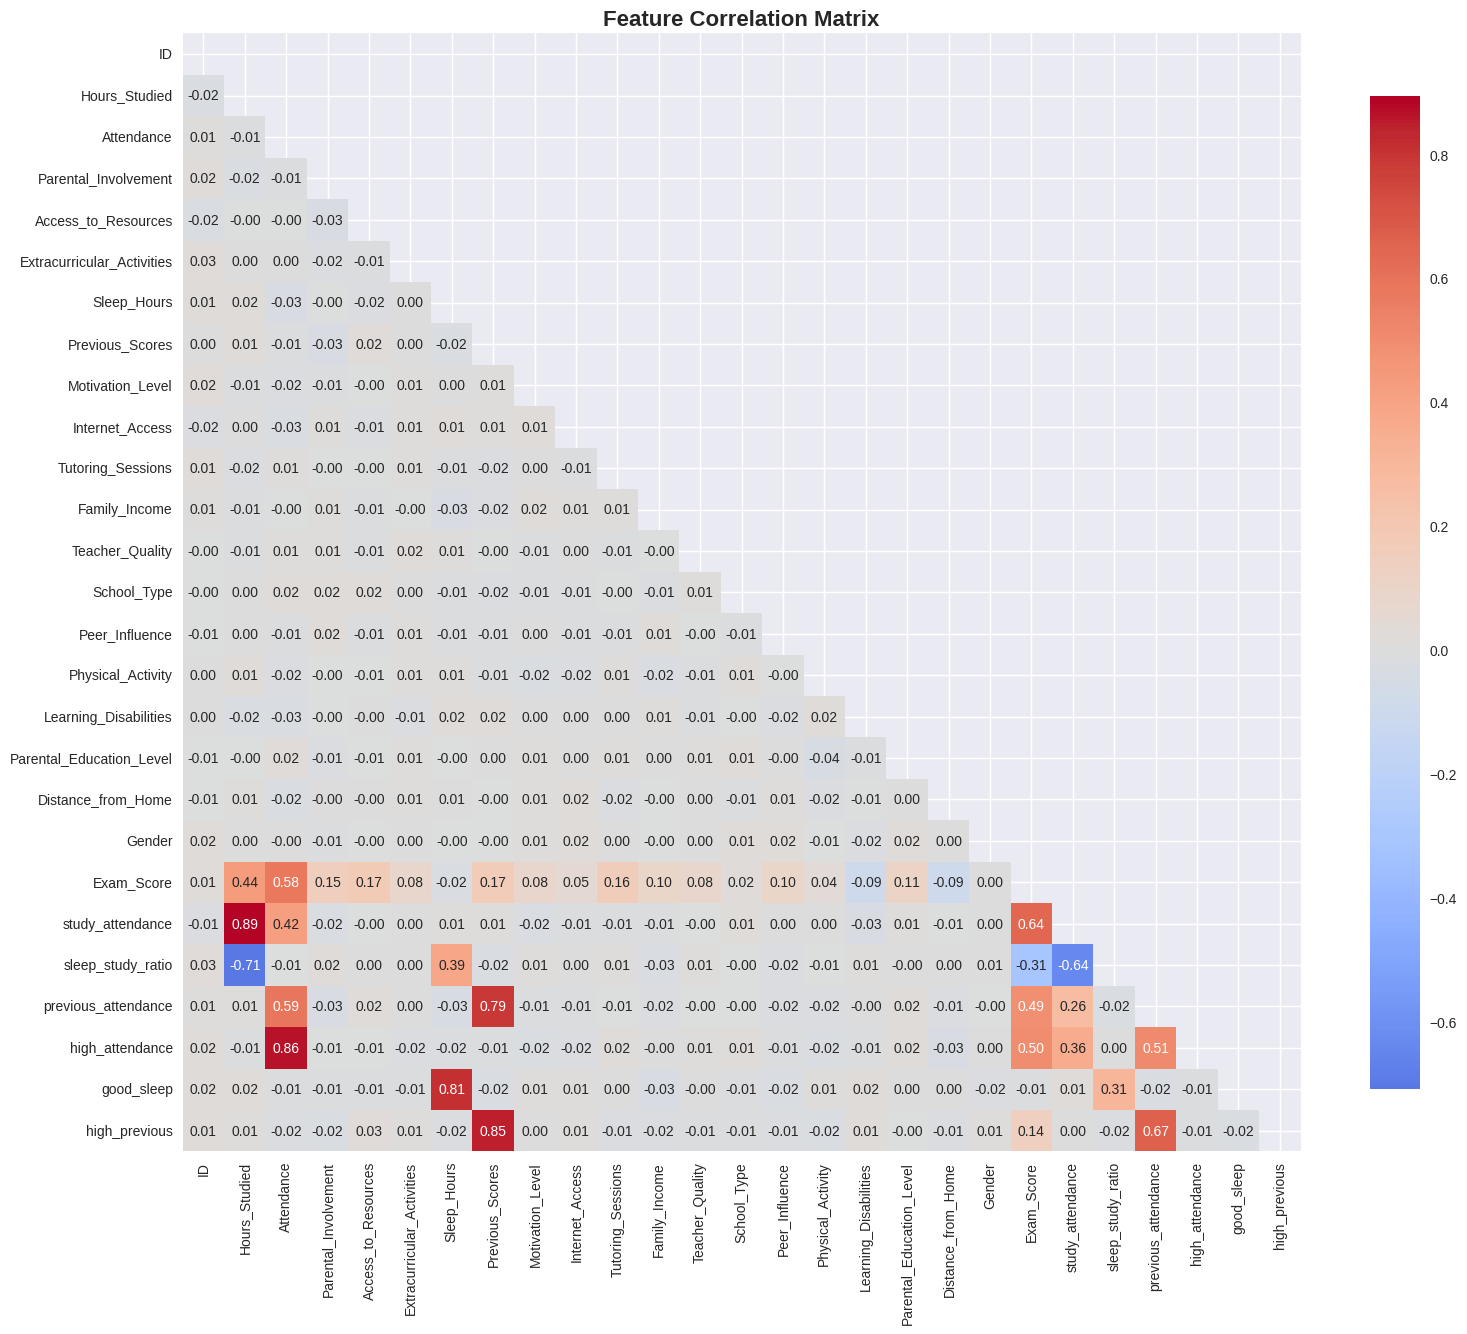

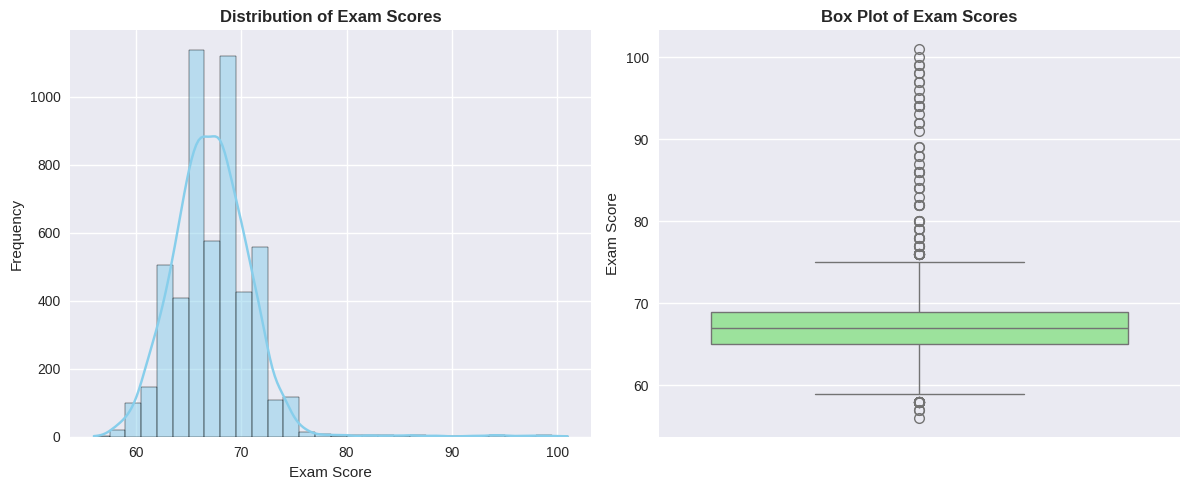

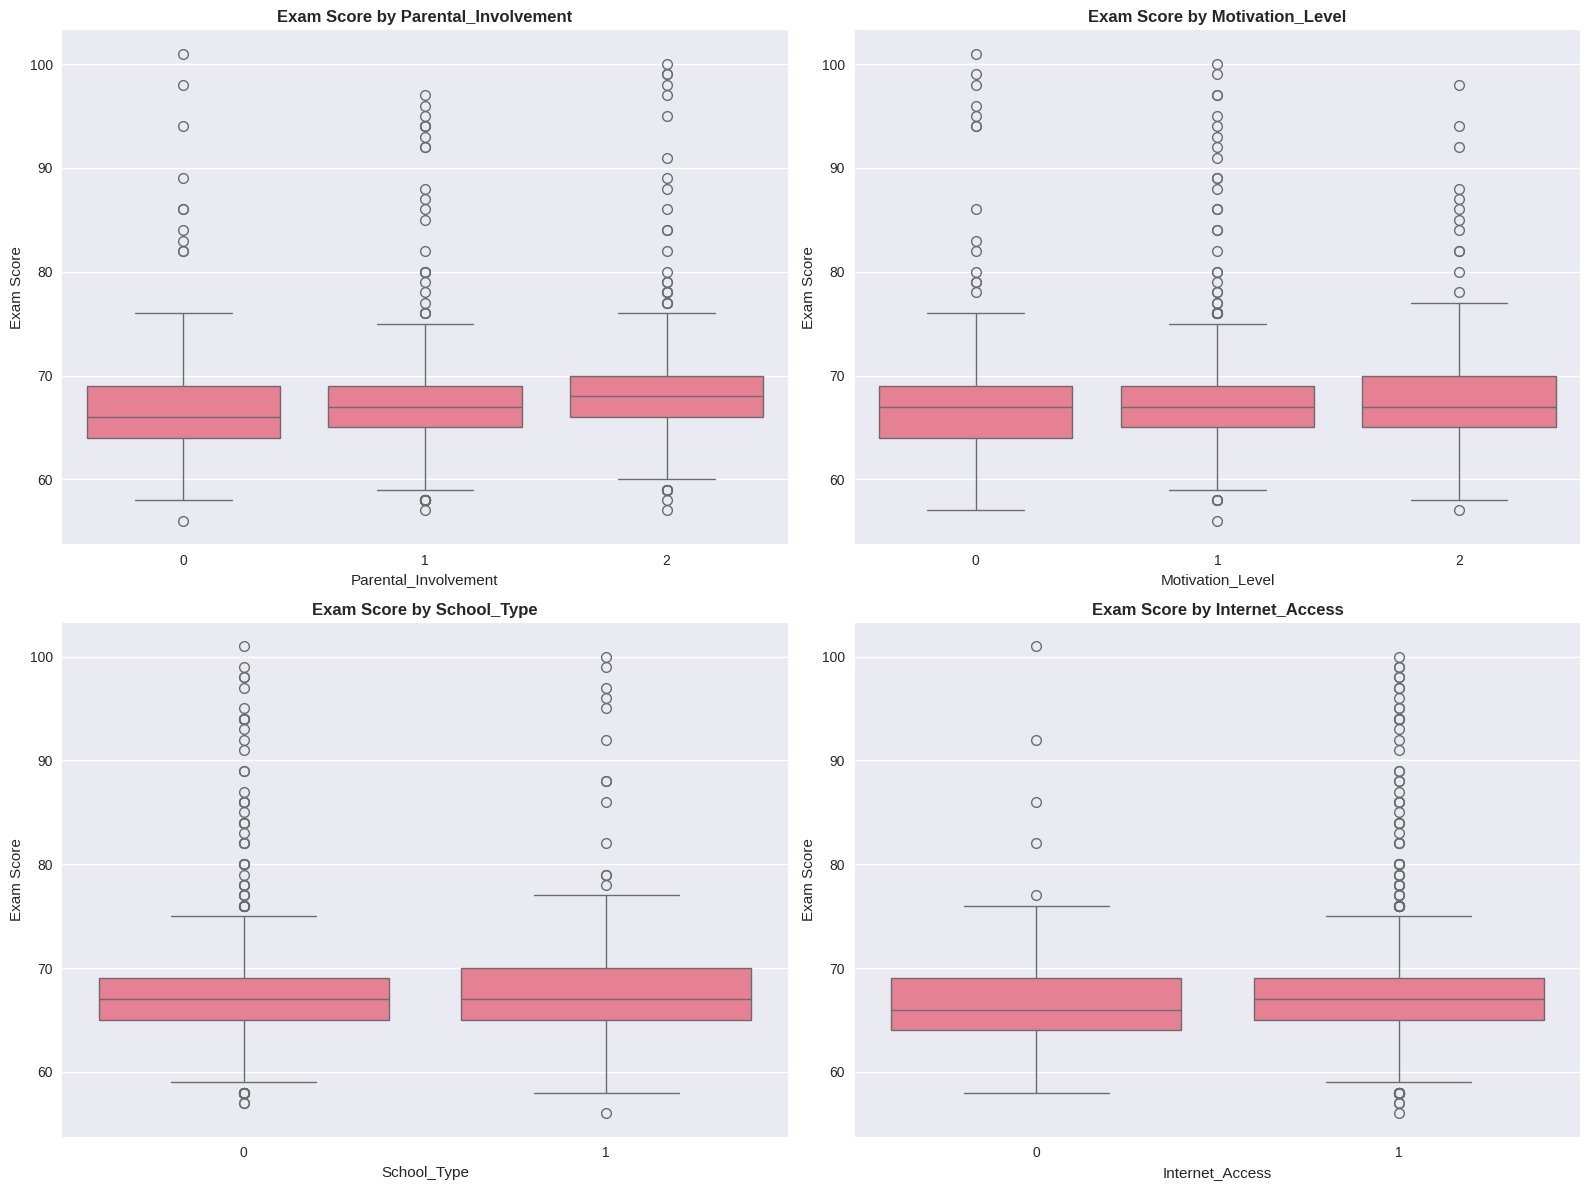

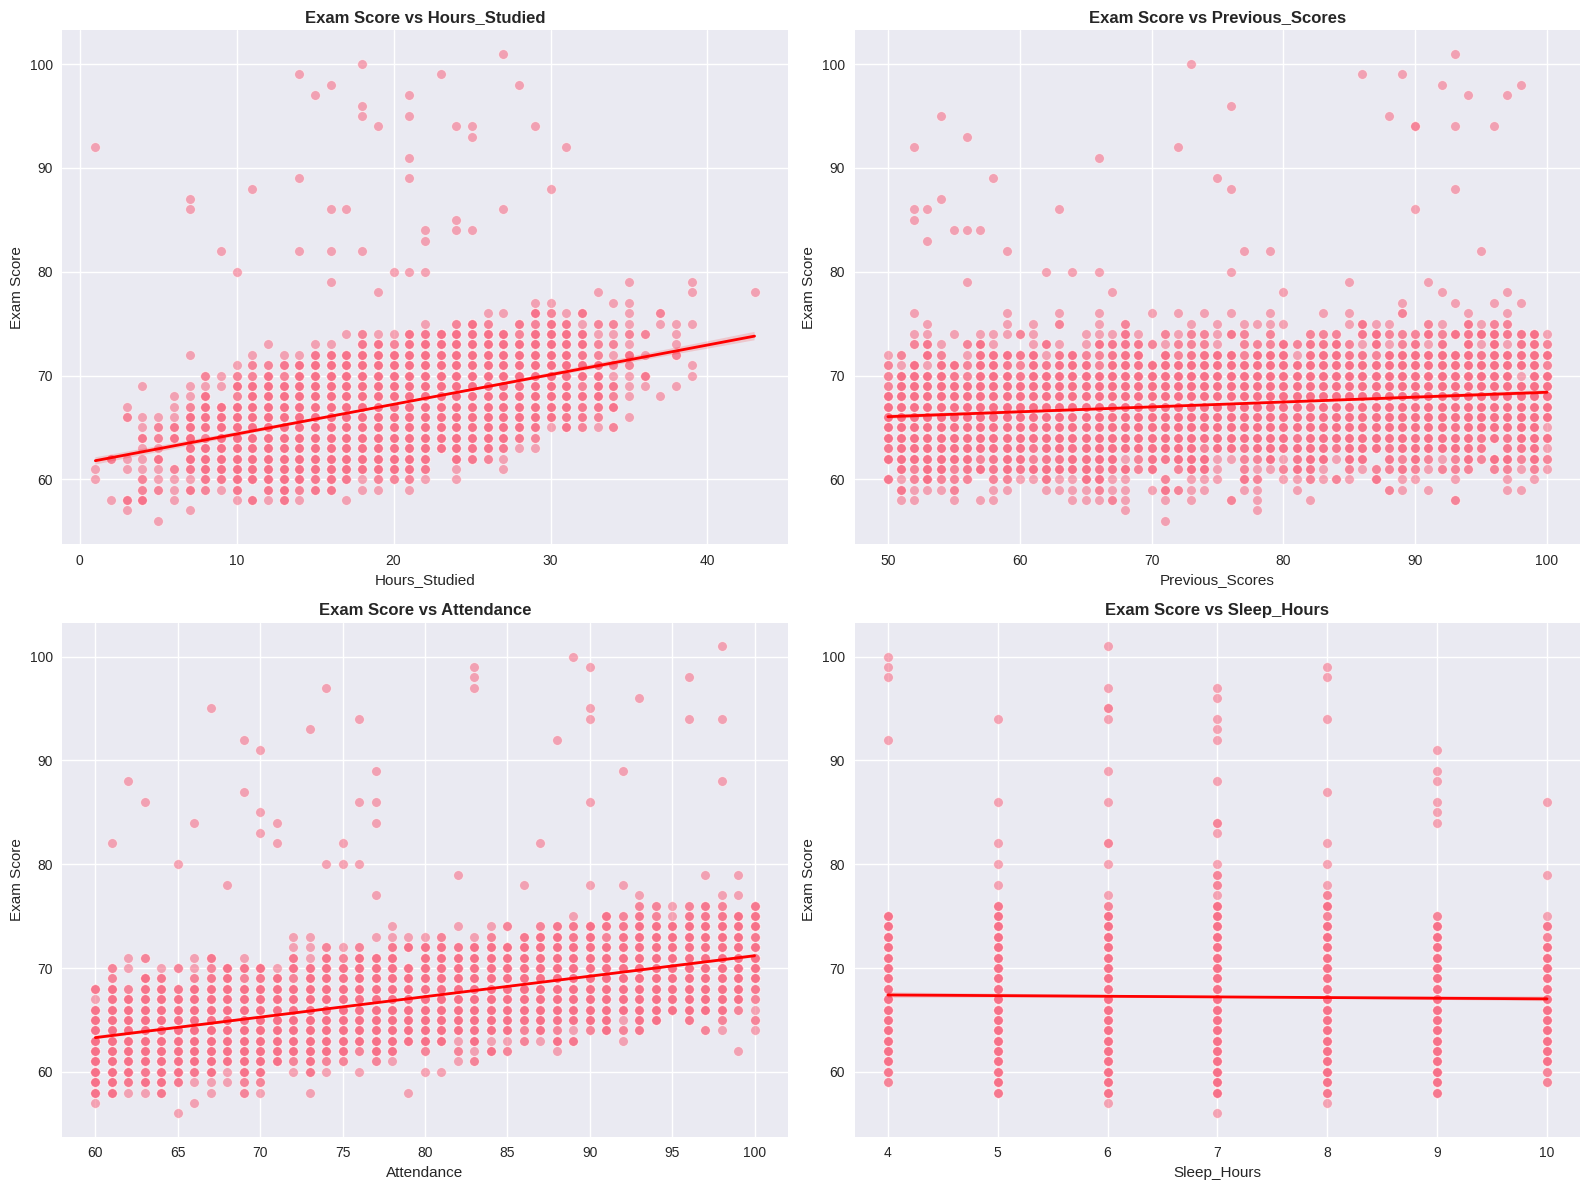

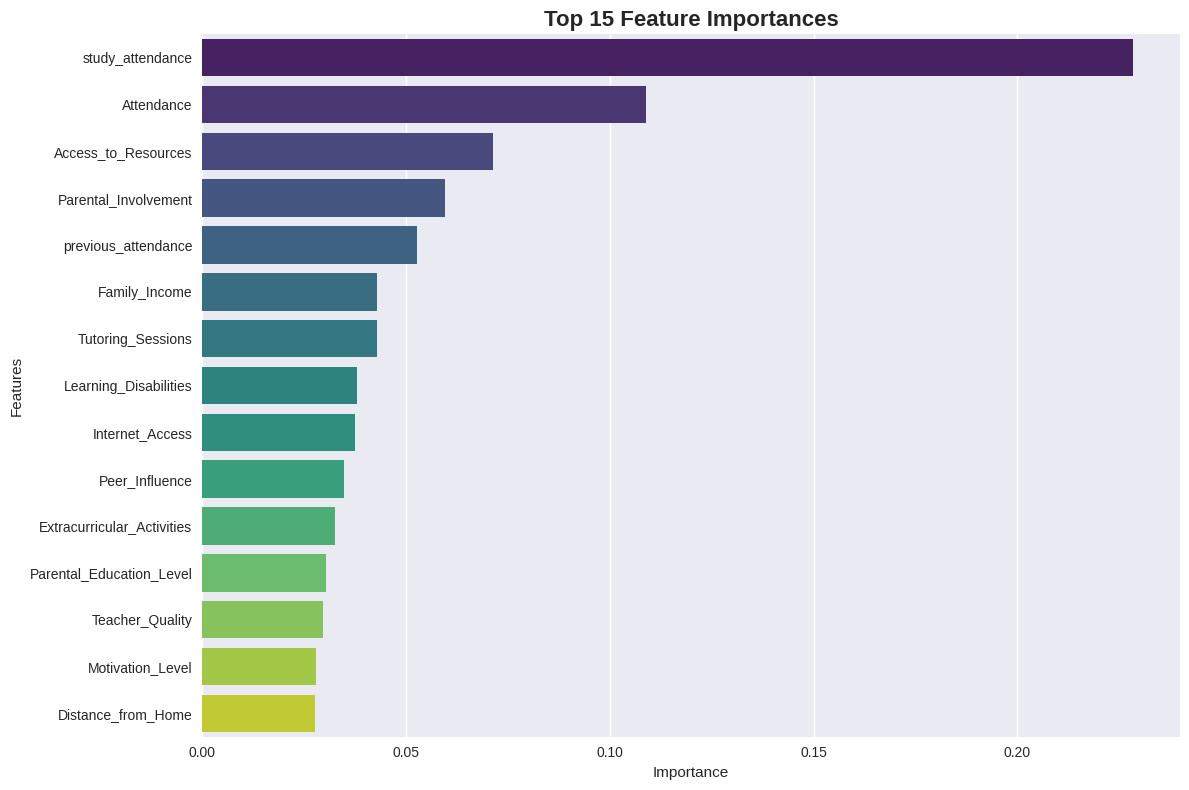

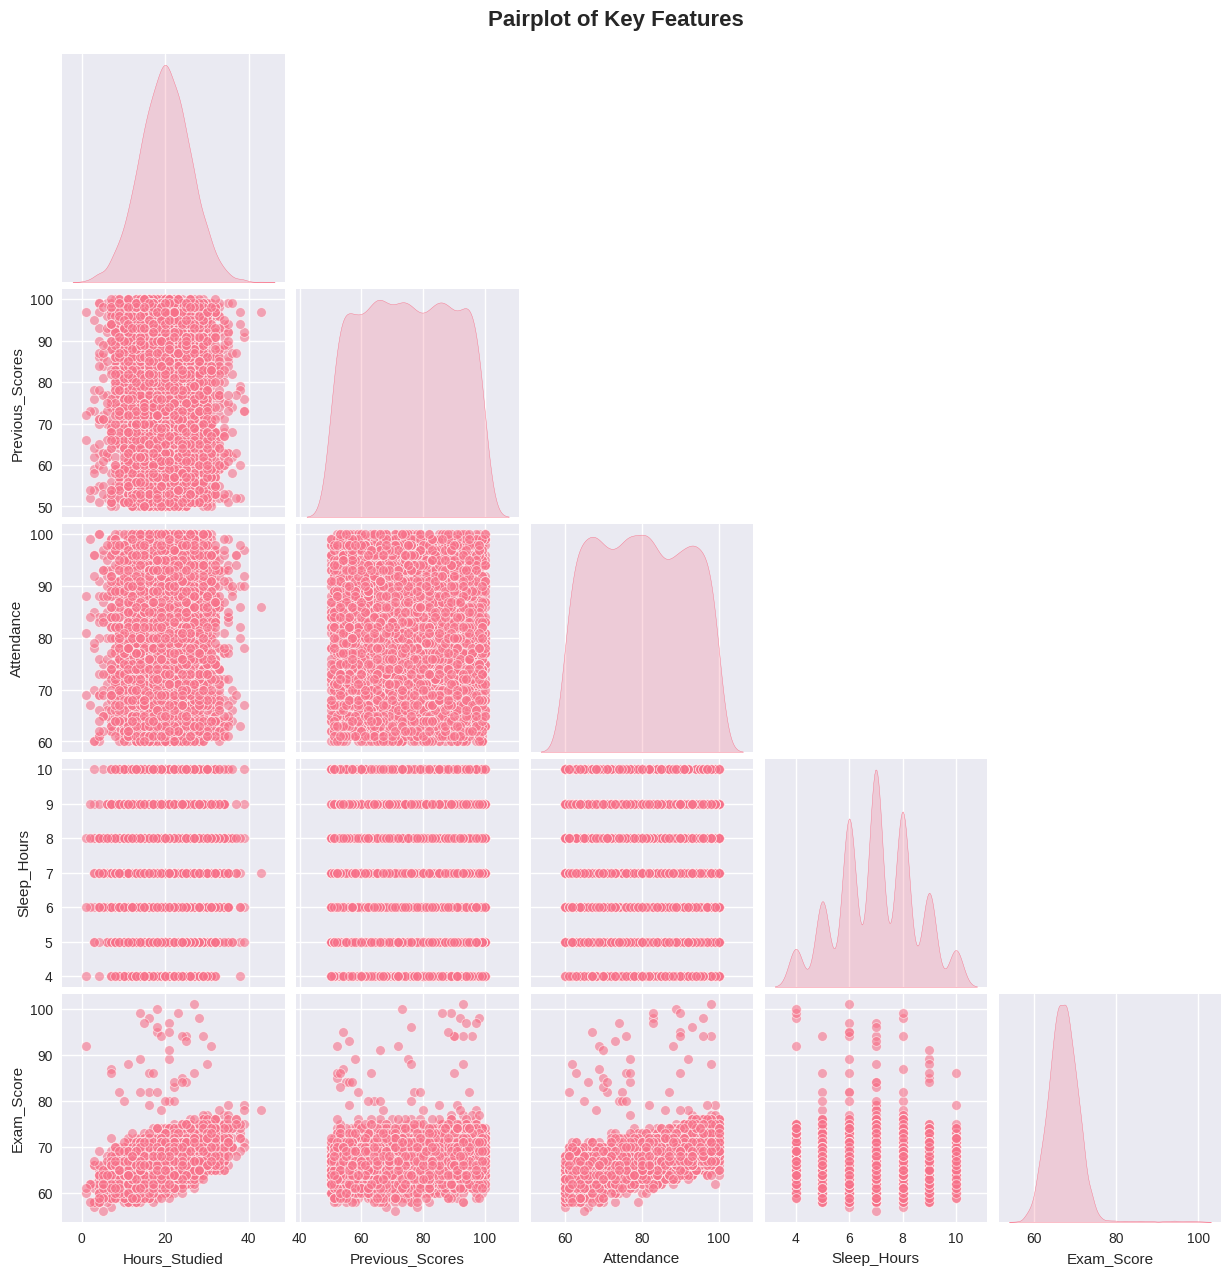

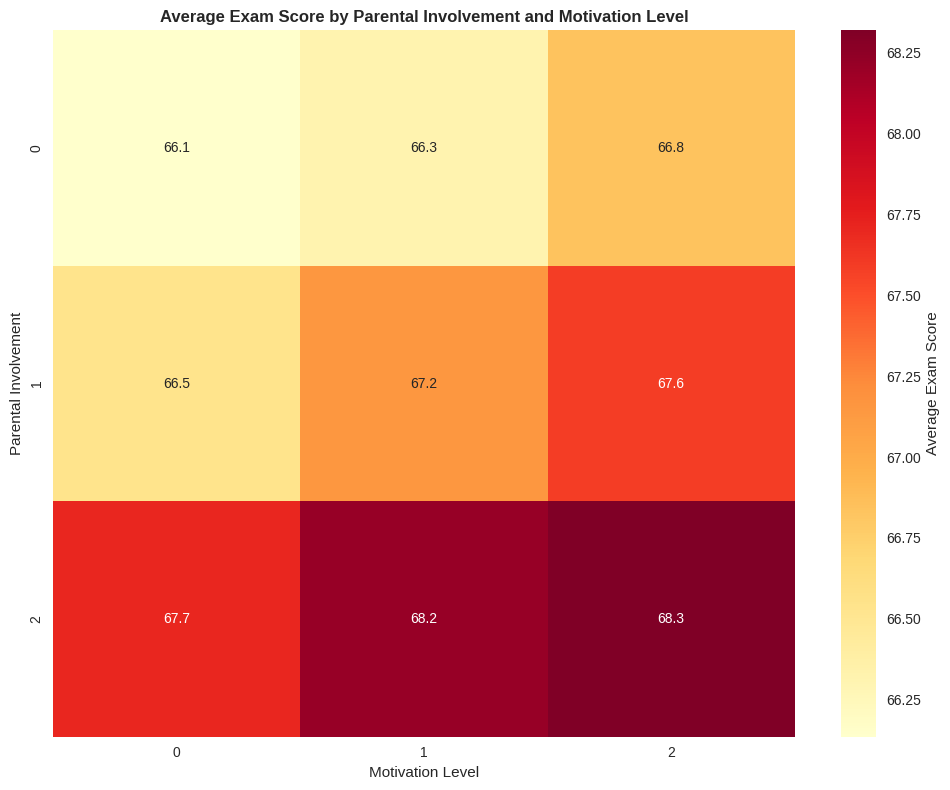

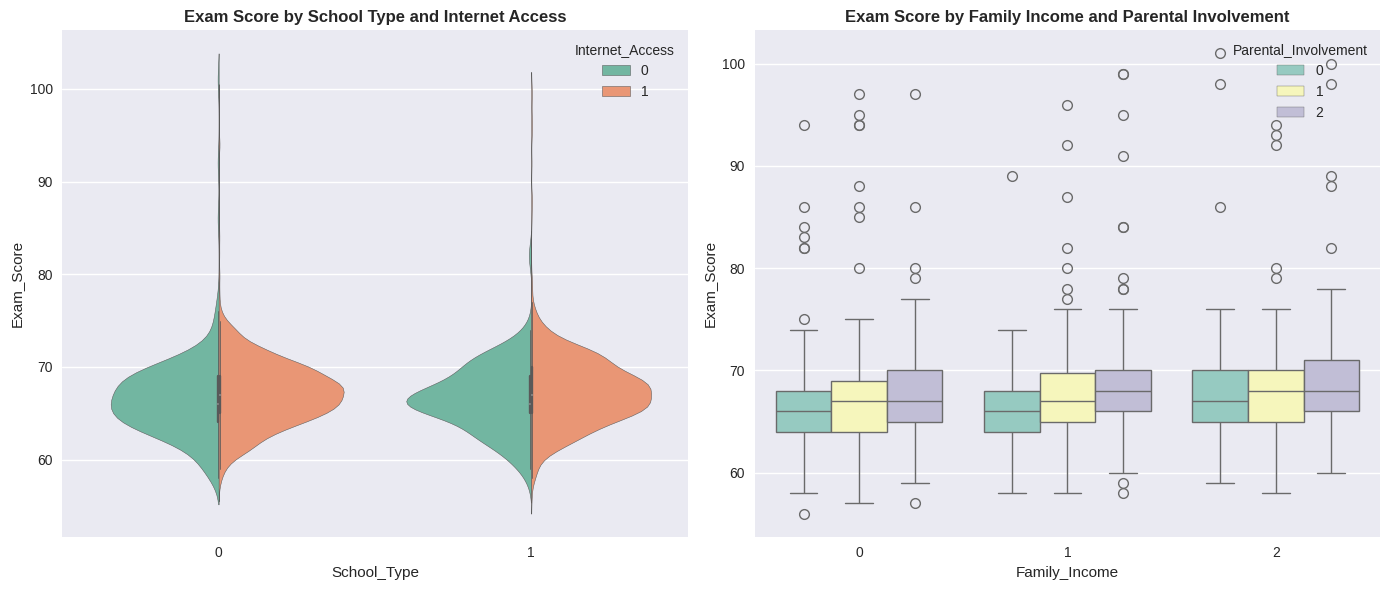

Submission file saved as 'final_submission.csv'

=== MODEL PERFORMANCE ===
Mean Absolute Error on Validation Set: 0.8692
Baseline (Mean): 67.22
Model Improvement: 66.35 points better than baseline

All visualizations have been saved as PNG files in the current directory!
1. correlation_heatmap.png
2. target_distribution.png
3. categorical_vs_score.png
4. numerical_scatter.png
5. feature_importance.png
6. pairplot.png
7. interaction_heatmap.png
8. distribution_comparison.png


In [246]:
models = {
    "CatBoost": CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, verbose=0),
    "LightGBM": LGBMRegressor(n_estimators=500),
    "XGBoost": XGBRegressor(n_estimators=500, learning_rate=0.1),
    "RandomForest": RandomForestRegressor(n_estimators=500),
    "LinearRegression": LinearRegression()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = max(0, 100 - mae)
    print(f"{name} → MAE: {mae:.2f}, R²: {r2:.2f}, Approx. Accuracy: {accuracy:.2f}%")


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")



train_data = pd.read_csv('test_score.csv')
test_data = pd.read_csv('test_dataset_test_score.csv')

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)
print("\nTrain columns:", train_data.columns.tolist())


print("\n=== TRAIN DATA INFO ===")
print(train_data.info())
print("\n=== MISSING VALUES ===")
print(train_data.isnull().sum())


def preprocess_data(df, is_train=True):
    df = df.copy()


    ordinal_mapping = {
        'Low': 0, 'Medium': 1, 'High': 2,
        'Negative': 0, 'Neutral': 1, 'Positive': 2,
        'Near': 0, 'Moderate': 1, 'Far': 2,
        'High School': 0, 'College': 1, 'Postgraduate': 2
    }

    binary_mapping = {
        'Yes': 1, 'No': 0,
        'Male': 1, 'Female': 0,
        'Public': 0, 'Private': 1
    }


    ordinal_cols = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level',
                   'Family_Income', 'Teacher_Quality', 'Peer_Influence',
                   'Parental_Education_Level', 'Distance_from_Home']

    for col in ordinal_cols:
        if col in df.columns:
            df[col] = df[col].map(ordinal_mapping).fillna(1)


    binary_cols = ['Extracurricular_Activities', 'Internet_Access', 'School_Type',
                  'Learning_Disabilities', 'Gender']

    for col in binary_cols:
        if col in df.columns:
            df[col] = df[col].map(binary_mapping).fillna(0)


    df['study_attendance'] = df['Hours_Studied'] * df['Attendance'] / 100
    df['sleep_study_ratio'] = df['Sleep_Hours'] / (df['Hours_Studied'] + 1)
    df['previous_attendance'] = df['Previous_Scores'] * (df['Attendance'] / 100)
    df['high_attendance'] = (df['Attendance'] > 80).astype(int)
    df['good_sleep'] = (df['Sleep_Hours'] >= 7).astype(int)
    df['high_previous'] = (df['Previous_Scores'] > 80).astype(int)

    return df


train_processed = preprocess_data(train_data)
test_processed = preprocess_data(test_data, is_train=False)

# =============================================================================
# VISUALIZATION 1: CORRELATION HEATMAP
# =============================================================================
plt.figure(figsize=(16, 14))
correlation_matrix = train_processed.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# VISUALIZATION 2: TARGET DISTRIBUTION
# =============================================================================
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(train_processed['Exam_Score'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Exam Scores', fontweight='bold')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(y=train_processed['Exam_Score'], color='lightgreen')
plt.title('Box Plot of Exam Scores', fontweight='bold')
plt.ylabel('Exam Score')

plt.tight_layout()
plt.savefig('target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# VISUALIZATION 3: CATEGORICAL FEATURES VS EXAM SCORE
# =============================================================================
categorical_features = ['Parental_Involvement', 'Motivation_Level', 'School_Type', 'Internet_Access']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.boxplot(data=train_processed, x=feature, y='Exam_Score', ax=axes[i])
    axes[i].set_title(f'Exam Score by {feature}', fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Exam Score')

plt.tight_layout()
plt.savefig('categorical_vs_score.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# VISUALIZATION 4: NUMERICAL FEATURES SCATTER PLOTS
# =============================================================================
numerical_features = ['Hours_Studied', 'Previous_Scores', 'Attendance', 'Sleep_Hours']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.scatterplot(data=train_processed, x=feature, y='Exam_Score', alpha=0.6, ax=axes[i])
    sns.regplot(data=train_processed, x=feature, y='Exam_Score',
                scatter=False, ax=axes[i], color='red', line_kws={'linewidth': 2})
    axes[i].set_title(f'Exam Score vs {feature}', fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Exam Score')

plt.tight_layout()
plt.savefig('numerical_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# VISUALIZATION 5: FEATURE IMPORTANCE (After Model Training)
# =============================================================================
# Prepare data for modeling
X = train_processed.drop(columns=['Exam_Score', 'ID'] if 'Exam_Score' in train_processed.columns else ['ID'])
y = train_processed['Exam_Score'] if 'Exam_Score' in train_processed.columns else None

X_test_final = test_processed.drop(columns=['ID'])

# Train model for feature importance
model = XGBRegressor(n_estimators=200, random_state=42, enable_categorical=True)
model.fit(X, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature', palette='viridis')
plt.title('Top 15 Feature Importances', fontsize=16, fontweight='bold')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# VISUALIZATION 6: PAIRPLOT OF KEY FEATURES
# =============================================================================
key_features = ['Hours_Studied', 'Previous_Scores', 'Attendance', 'Sleep_Hours', 'Exam_Score']
sns.pairplot(train_processed[key_features], diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Key Features', y=1.02, fontsize=16, fontweight='bold')
plt.savefig('pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# VISUALIZATION 7: INTERACTION HEATMAP
# =============================================================================
pivot_data = train_processed.pivot_table(
    values='Exam_Score',
    index='Parental_Involvement',
    columns='Motivation_Level',
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_data, annot=True, cmap='YlOrRd', fmt='.1f', cbar_kws={'label': 'Average Exam Score'})
plt.title('Average Exam Score by Parental Involvement and Motivation Level', fontweight='bold')
plt.xlabel('Motivation Level')
plt.ylabel('Parental Involvement')
plt.tight_layout()
plt.savefig('interaction_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# VISUALIZATION 8: DISTRIBUTION COMPARISON
# =============================================================================
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.violinplot(data=train_processed, x='School_Type', y='Exam_Score',
               hue='Internet_Access', split=True, palette='Set2')
plt.title('Exam Score by School Type and Internet Access', fontweight='bold')

plt.subplot(1, 2, 2)
sns.boxplot(data=train_processed, x='Family_Income', y='Exam_Score',
            hue='Parental_Involvement', palette='Set3')
plt.title('Exam Score by Family Income and Parental Involvement', fontweight='bold')

plt.tight_layout()
plt.savefig('distribution_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# FINAL MODEL TRAINING AND PREDICTION
# =============================================================================
# Train final model with best parameters
final_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=6,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42,
    enable_categorical=True
)

final_model.fit(X, y)

# Make predictions
predictions = final_model.predict(X_test_final)

# Create submission file
submission = pd.DataFrame({
    'ID': test_data['ID'],
    'Exam_Score': predictions
})

# Save submission
submission.to_csv('final_submission.csv', index=False)
print("Submission file saved as 'final_submission.csv'")

# =============================================================================
# MODEL EVALUATION (if you have validation set)
# =============================================================================
# Split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and validate
final_model.fit(X_train, y_train)
val_predictions = final_model.predict(X_val)
mae = mean_absolute_error(y_val, val_predictions)

print(f"\n=== MODEL PERFORMANCE ===")
print(f"Mean Absolute Error on Validation Set: {mae:.4f}")
print(f"Baseline (Mean): {y.mean():.2f}")
print(f"Model Improvement: {(y.mean() - mae):.2f} points better than baseline")

# =============================================================================
# SAVE ALL VISUALIZATIONS
# =============================================================================
print("\nAll visualizations have been saved as PNG files in the current directory!")
print("1. correlation_heatmap.png")
print("2. target_distribution.png")
print("3. categorical_vs_score.png")
print("4. numerical_scatter.png")
print("5. feature_importance.png")
print("6. pairplot.png")
print("7. interaction_heatmap.png")
print("8. distribution_comparison.png")

In [243]:
test_df = pd.read_csv('test_dataset_test_score.csv')
# test_df.head(1)

X  = df.drop(columns=['Exam_Score'])
y = df['Exam_Score']


kitty_col = test_df.select_dtypes(include='object').columns.tolist()
print(kitty_col)

encoder = LabelEncoder()
oe =OrdinalEncoder()
test_df[cat_cols] = oe.fit_transform(test_df[cat_cols])
# for col in kitty_col:
#   test_df[col] = encoder.fit_transform(test_df[col].astype('str'))

test_df.head(2)

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

model  = CatBoostRegressor(
    iterations=500,
    verbose=10,
    learning_rate=0.5,
    eval_metric='MAE',
    depth=8
)

# model.fit(X,y , cat_features=cat_cols)
# # Xhat = test_df.drop(columns=['Exam_Score'])
Xhat = test_df
# Xhat = scaler.fit_transform(Xhat)
# that = model.predict(Xhat)

# print(that[:2])
# print(len(test_df), len(that))


# model2= LinearRegression()
# model2.fit(X,y)
# yh = model2.predict(Xhat)


model2 =  XGBRegressor(n_estimators=1000, learning_rate=0.2)
model2.fit(X,y)
yhat2 = model2.predict(Xhat)

senddf = pd.DataFrame({
    'subtaskID' : [5]*len(test_df),
    'datapointID':test_df['ID'] ,
    'answer':yhat2
})

senddf.to_csv('output.csv',index=False)


['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
